## Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

# import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model

2024-11-13 13:38:33.788428: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-13 13:38:34.064486: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-13 13:38:34.154755: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 13:38:38.778051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

## Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [4]:
print('Train Images Shape:           ', x_train.shape)
print('Train Labels Shape:           ', y_train.shape)

print('\nValidation Images Shape:      ', x_valid.shape)
print('Validation Labels Shape:      ', y_valid.shape)

print('\nTest Images Shape:            ', x_test.shape)
print('Test Labels Shape:            ', y_test.shape)

Train Images Shape:            (40000, 32, 32, 3)
Train Labels Shape:            (40000, 1)

Validation Images Shape:       (10000, 32, 32, 3)
Validation Labels Shape:       (10000, 1)

Test Images Shape:             (10000, 32, 32, 3)
Test Labels Shape:             (10000, 1)


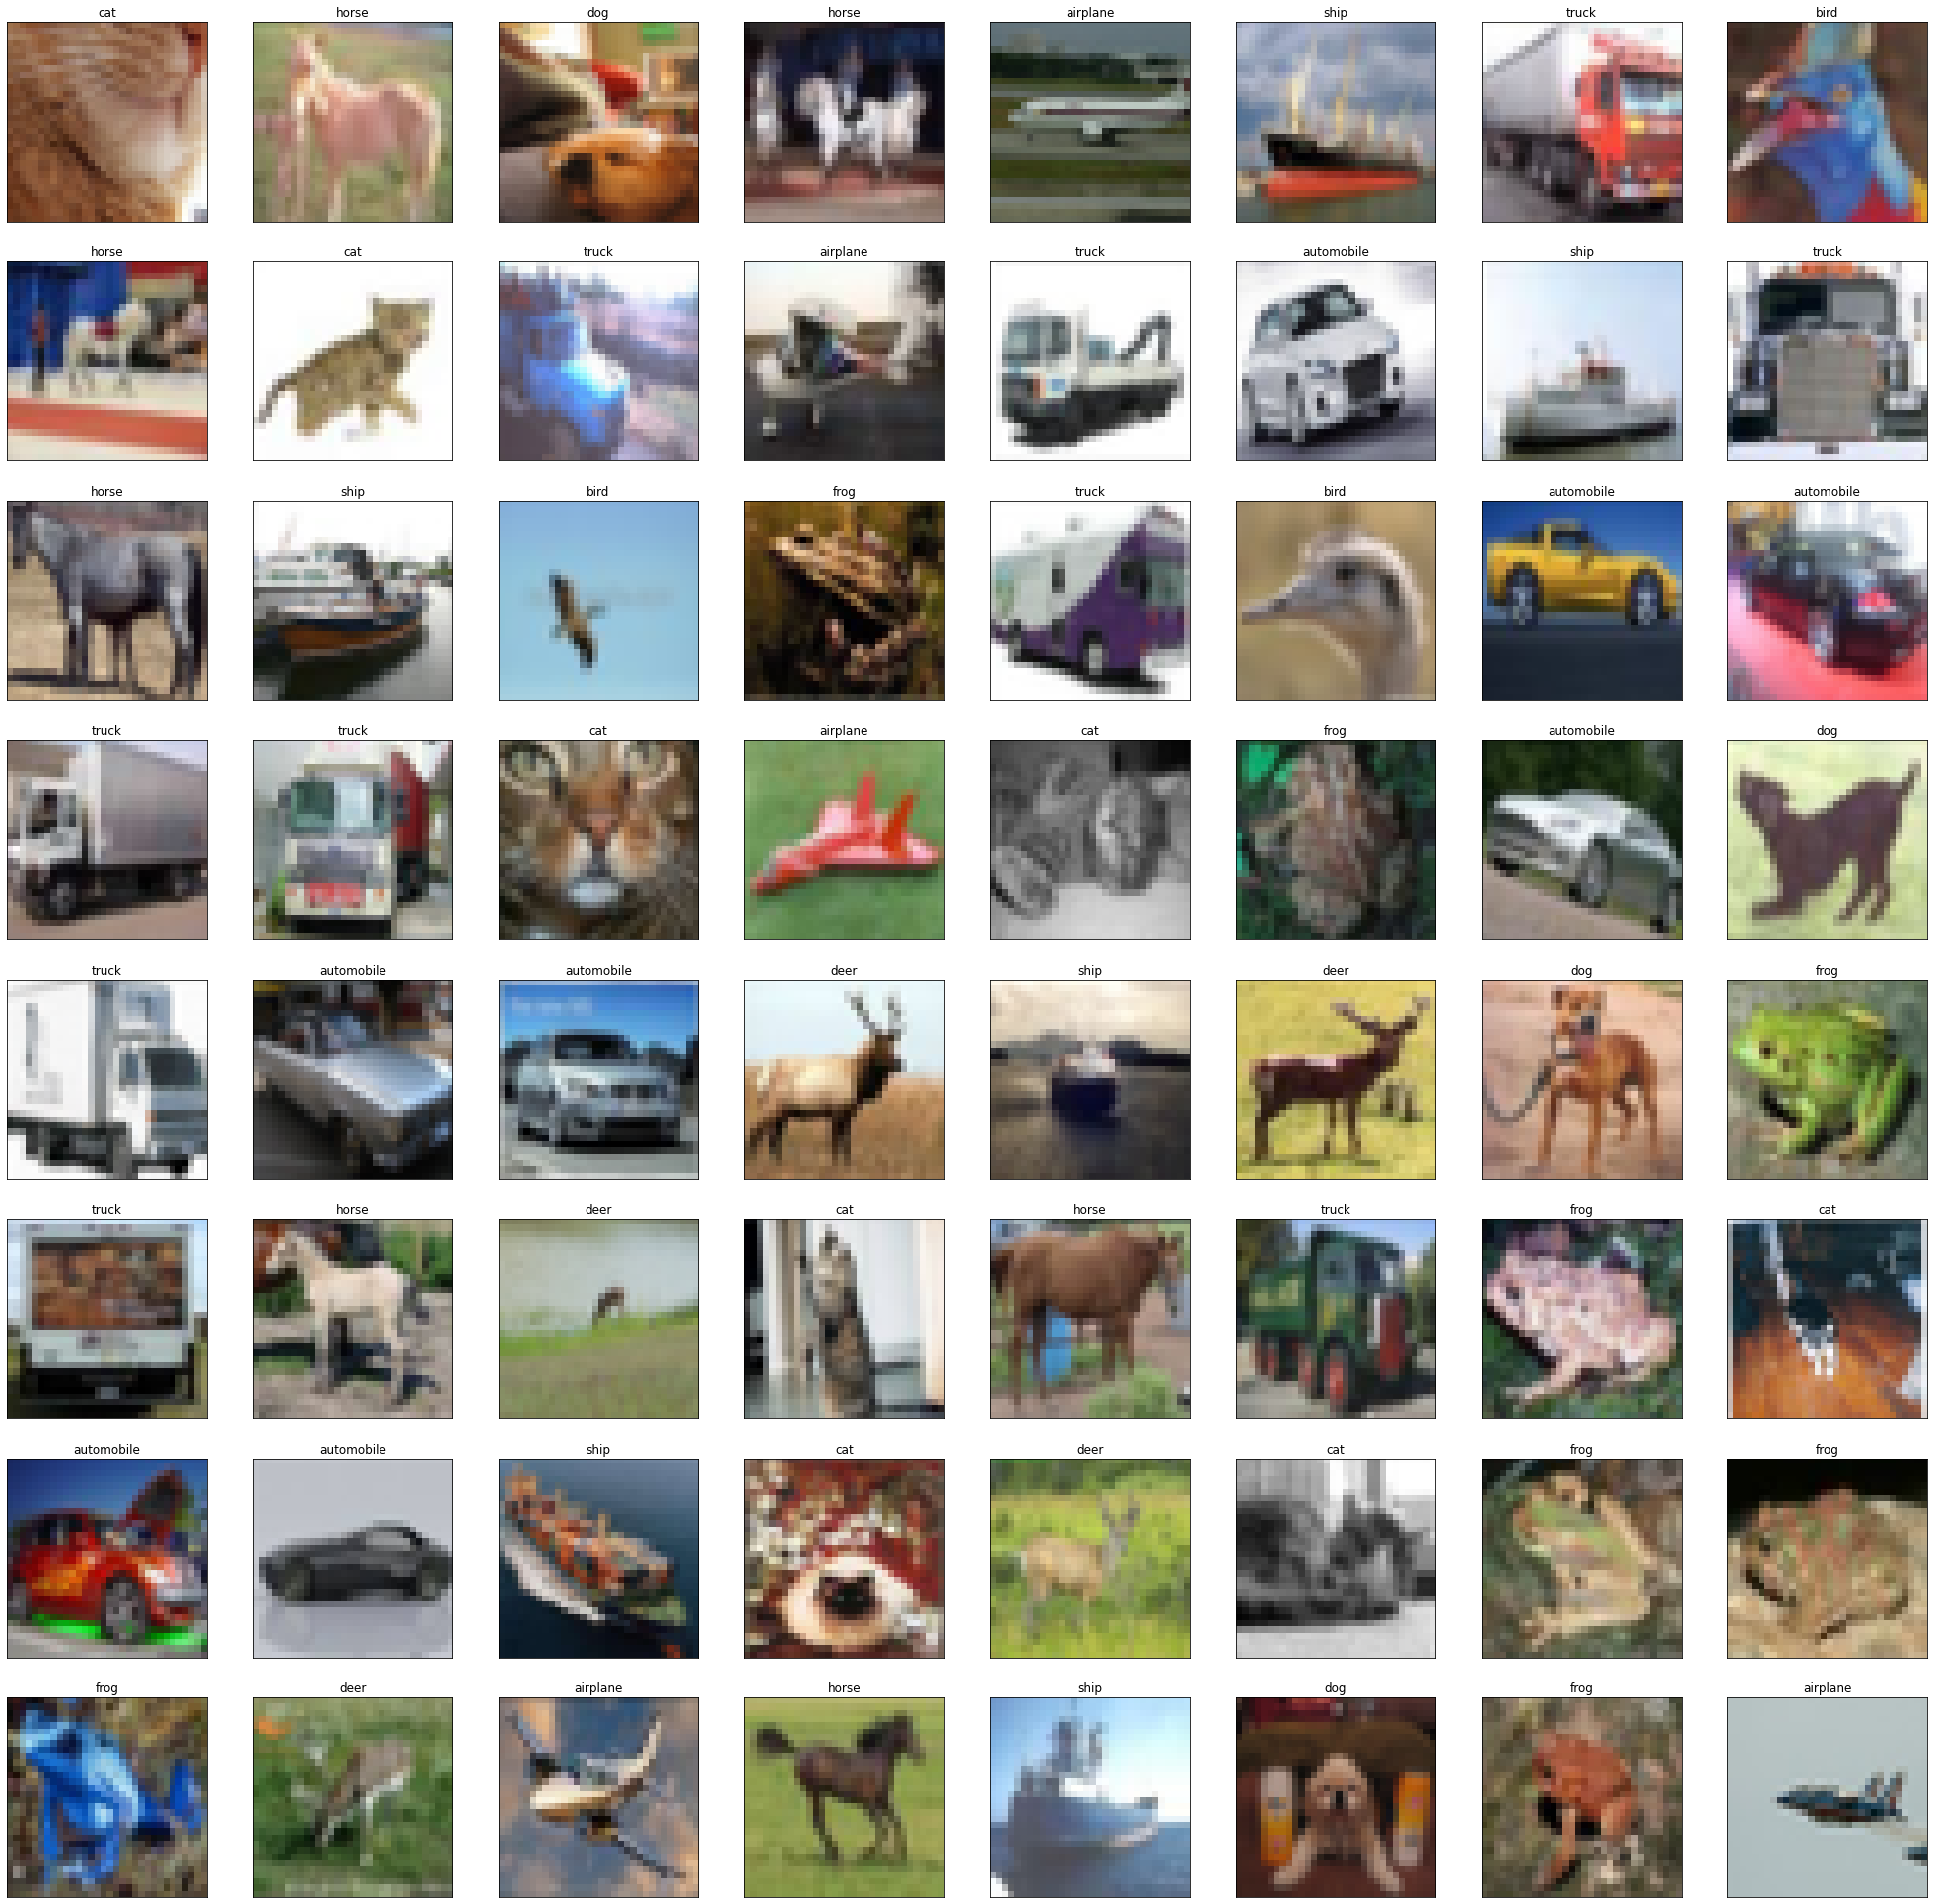

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
plt.figure(figsize=(35,35))

for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(x_train[i])

    plt.title(class_names[y_train[i][0]], fontsize=12)

plt.show()

## Normalization

In [6]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_valid = x_valid.astype('float32')

mean = np.mean(x_train)
std  = np.std(x_train)

x_train = (x_train-mean)/(std+1e-7)
x_test  = (x_test-mean) /(std+1e-7)
x_valid = (x_valid-mean)/(std+1e-7)

## Label Encodding

In [7]:
y_train

array([[3],
       [7],
       [5],
       ...,
       [5],
       [4],
       [8]], dtype=uint8)

In [8]:
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)

In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Augmentation

In [10]:
data_generator = ImageDataGenerator(
    rotation_range=15,
     
    horizontal_flip=True,
    
    zoom_range=0.1,
    
    brightness_range=[0.9,1.1],
    
    channel_shift_range=0.1,
)

## Model Config

In [11]:
model = Sequential()

weight_decay = 0.0001

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))   
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay))) 
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay))) 
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))
model.add(Flatten())

model.add(Dense(10, activation='softmax'))

2024-11-13 13:39:03.783688: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-13 13:39:03.954725: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 31134 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:86:00.0, compute capability: 7.0


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

## Model Train

In [13]:
batch_size = 128

epochs = 150

optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

model.fit(data_generator.flow(x_train, y_train, batch_size=batch_size),
          epochs=epochs,
          validation_data=(x_valid, y_valid),
          callbacks=[reduce_lr], 
          verbose=2)

Epoch 1/150


2024-11-13 13:39:10.458063: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8700
2024-11-13 13:39:10.741089: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


313/313 - 107s - loss: 2.4649 - accuracy: 0.3188 - val_loss: 2.2759 - val_accuracy: 0.2683 - lr: 5.0000e-04 - 107s/epoch - 343ms/step
Epoch 2/150
313/313 - 101s - loss: 1.8101 - accuracy: 0.4322 - val_loss: 2.0421 - val_accuracy: 0.3798 - lr: 5.0000e-04 - 101s/epoch - 323ms/step
Epoch 3/150
313/313 - 99s - loss: 1.6002 - accuracy: 0.4977 - val_loss: 1.4905 - val_accuracy: 0.5391 - lr: 5.0000e-04 - 99s/epoch - 318ms/step
Epoch 4/150
313/313 - 99s - loss: 1.4733 - accuracy: 0.5371 - val_loss: 1.4874 - val_accuracy: 0.5356 - lr: 5.0000e-04 - 99s/epoch - 316ms/step
Epoch 5/150
313/313 - 100s - loss: 1.3654 - accuracy: 0.5749 - val_loss: 1.3414 - val_accuracy: 0.5660 - lr: 5.0000e-04 - 100s/epoch - 318ms/step
Epoch 6/150
313/313 - 97s - loss: 1.2921 - accuracy: 0.5954 - val_loss: 1.1301 - val_accuracy: 0.6386 - lr: 5.0000e-04 - 97s/epoch - 310ms/step
Epoch 7/150
313/313 - 99s - loss: 1.2092 - accuracy: 0.6216 - val_loss: 1.1493 - val_accuracy: 0.6337 - lr: 5.0000e-04 - 99s/epoch - 316ms/ste

## Save Model and History

In [24]:
import json

with open('history_cifar.json', 'w') as f:
    json.dump(str(model.history.history), f)

In [ ]:
# with open('history_cifar.json', 'r') as f:
#     history = json.load(f)

In [22]:
model.save('cifar_cnn.h5')

In [ ]:
# from tensorflow.keras.models import load_model
# model = load_model('/home/cdsw/Belajar_Najmi/ANN/Final_Ex/cifar_cnn.h5')

## Result with Visual

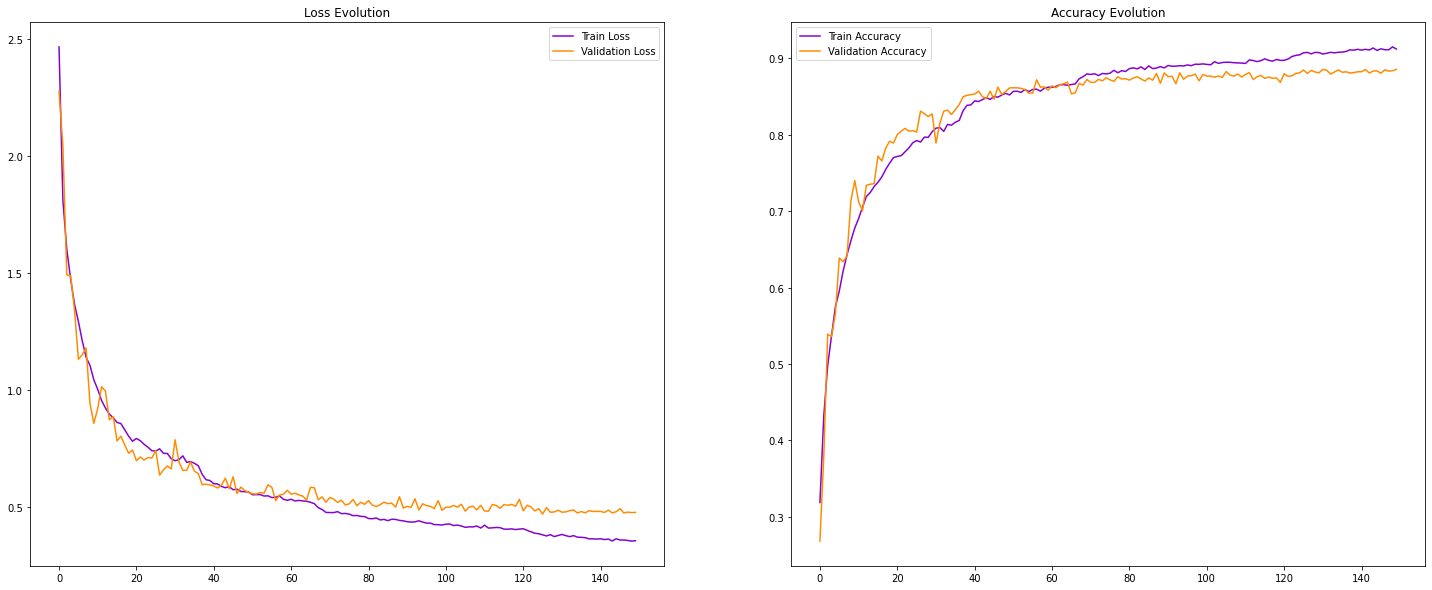

In [25]:
plt.figure(figsize=(25,10))

# training and validation loss
plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Train Loss', color='#8502d1')
plt.plot(model.history.history['val_loss'], label='Validation Loss', color='darkorange')
plt.legend()
plt.title('Loss Evolution')

# training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Train Accuracy', color='#8502d1')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', color='darkorange')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

## Run Model with Test Set

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss    :', test_loss)

313/313 [==============================] - 3s 10ms/step - loss: 0.4869 - accuracy: 0.8846

Test Accuracy: 0.8845999836921692
Test Loss    : 0.48687371611595154


In [35]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

In [28]:
y_pred = model.predict(x_test)

313/313 [==============================] - 3s 7ms/step


In [29]:
y_pred = y_pred.argmax(axis=1)
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [30]:
# y_pred  = to_categorical(y_pred, 10)

In [31]:
# y_pred

In [32]:
y_test = y_test.argmax(axis=1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [33]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1000
           1       0.96      0.95      0.95      1000
           2       0.89      0.83      0.86      1000
           3       0.81      0.73      0.77      1000
           4       0.88      0.88      0.88      1000
           5       0.87      0.77      0.82      1000
           6       0.78      0.97      0.87      1000
           7       0.92      0.94      0.93      1000
           8       0.94      0.94      0.94      1000
           9       0.88      0.96      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



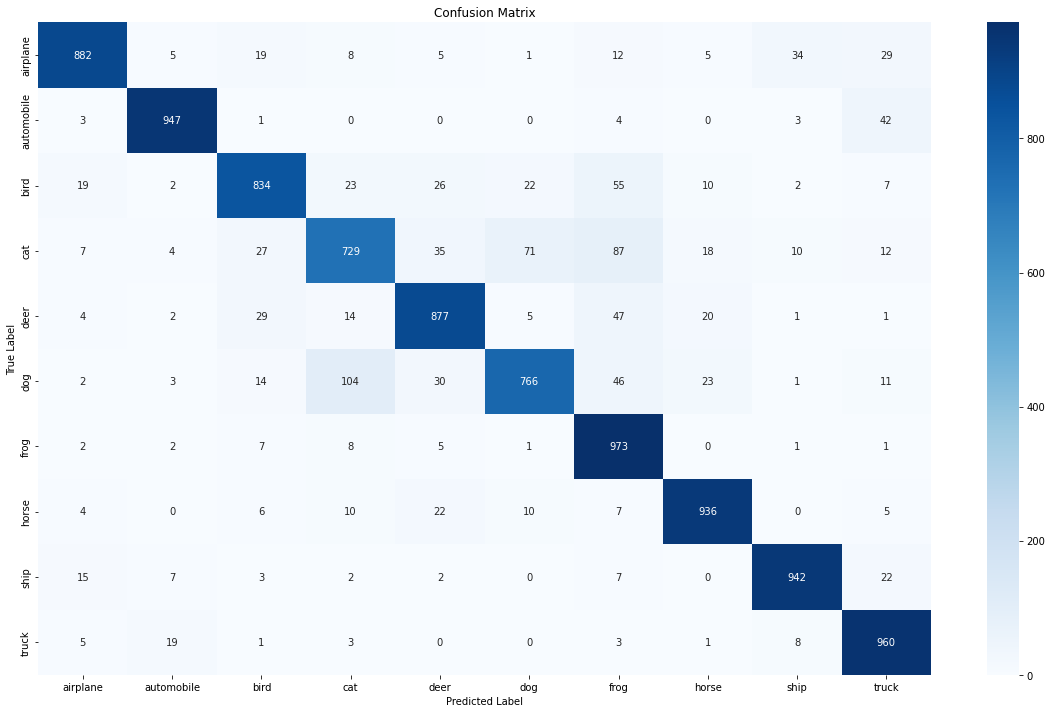

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, 
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Sampling New data with Model

### Sampling 1

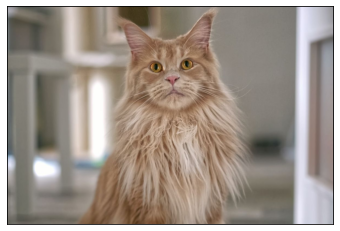

In [87]:
import cv2

path_image = "https://asset.kompas.com/crops/t28jNvG07H9he8WELc1CBto210s=/0x713:1920x1993/1200x800/data/photo/2022/07/30/62e4f14e50f4b.jpg"
resp = urllib.request.urlopen(path_image)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [88]:
image = cv2.resize(image, (32,32))
image = (image-mean)/(std+1e-7)
image = image.reshape((1, 32, 32, 3))

In [89]:
prediction = model.predict(image)

1/1 [==============================] - 0s 41ms/step


In [90]:
predicted_class = prediction.argmax()
print('Predict Label = ', class_names[predicted_class])

Predict Label =  bird


### Sampling 2

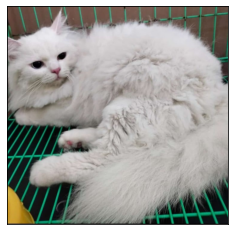

In [78]:
path_image = "/home/cdsw/Belajar_Najmi/ANN/Final_Ex/MyAretha2.jpg"
image = cv2.imread(path_image, cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [79]:
image = cv2.resize(image, (32,32))
image = (image-mean)/(std+1e-7)
image = image.reshape((1, 32, 32, 3))

In [80]:
prediction = model.predict(image)

1/1 [==============================] - 0s 47ms/step


In [81]:
predicted_class = prediction.argmax()
print('Predict Label = ', class_names[predicted_class])

Predict Label =  frog


### Sampling 3

In [82]:
path_image = "https://cdn1-production-images-kly.akamaized.net/95RPSsDlQi8V7je3r8ao5sA55jw=/1200x1200/smart/filters:quality(75):strip_icc():format(webp)/kly-media-production/medias/4659406/original/099113300_1700695376-kucing_persia_01.jpg"

resp = urllib.request.urlopen(path_image)
image = np.asarray(bytearray(resp.read()), dtype="uint8")

image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

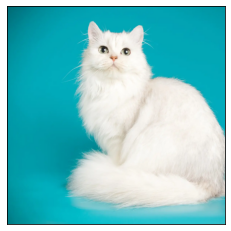

In [83]:
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [84]:
image = cv2.resize(image, (32,32))
image = (image-mean)/(std+1e-7)
image = image.reshape((1, 32, 32, 3))

In [85]:
prediction = model.predict(image)

1/1 [==============================] - 0s 32ms/step


In [86]:
predicted_class = prediction.argmax()
print('Predict Label = ', class_names[predicted_class])

Predict Label =  cat
